# IMPORT LIBRARIES

In [30]:
import pandas as pd
import numpy as np
import pathlib
from tqdm.notebook import tqdm
import os

In [31]:
pd.__version__

'1.3.5'

In [32]:
#!pip3 install --upgrade pandas

# IMPORT DATA

In [33]:
import pickle

with open('C:/Users/Saulo Mendes Santos/OneDrive/Documents/2. LETRAS/0. Doutorado/0. Recherche/2. Projet pilot/Données Oliver/0. Descrição provisória das unidades/VITERBI plus DECISION MODEL/viterbi_dict.pickle', 'rb') as handle:
#with open('/Users/saulosantos/Documents/0. Doutorado/0. Recherche/2. Projet pilot/Descrição provisória das unidades/VITERBI plus DECISION MODEL/viterbi_dict.pickle', 'rb') as handle:
    viterbi_dict = pickle.load(handle)

In [34]:
len(viterbi_dict.keys())

564

In [35]:
viterbi_dict['bfamcv02__289__RUT'][0].columns

Index(['timeframe', 'opensmile', 'praat_ac', 'praat_cc', 'praat_shs', 'swipe',
       'rapt', 'yin', 'pyin', 'maps', 'bana', 'pefac', 'srh', 'straight',
       'swipep', 'yaapt', 'hnr', 'cpp', 'creaky_prob', 'creaky_decision',
       'oliver', 'intensity_dB', 'se', 'f0_derivative_oliver', 'mfcc_0',
       'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
       'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19',
       'file', 'voice_decision'],
      dtype='object')

In [36]:
viterbi_dict['bfamcv02__289__RUT'][0]['timeframe']

0      0.000
1      0.005
2      0.010
3      0.015
4      0.020
       ...  
393    1.965
394    1.970
395    1.975
396    1.980
397    1.985
Name: timeframe, Length: 398, dtype: float64

In [37]:
data_textgrid = pd.read_csv('C:/Users/Saulo Mendes Santos/OneDrive/Documents/2. LETRAS/0. Doutorado/0. Recherche/2. Projet pilot/Données Oliver/0. Descrição provisória das unidades/20210824_iu_boundaries.csv')
#data_textgrid = pd.read_csv('/Users/saulosantos/Documents/0. Doutorado/0. Recherche/2. Projet pilot/Descrição provisória das unidades/20210824_iu_boundaries.csv')

In [38]:
data_textgrid

,Unnamed: 0,file,utt,N_UT,iu,iu_start,iu_end
0,0,bpubmn01__001__LUA,1,1,AUX,0.613553,0.823710
1,1,bpubmn01__001__LUA,1,2,DCT,0.823710,1.527371
2,2,bpubmn01__001__LUA,1,3,TOP,1.527371,4.164102
3,3,bpubmn01__001__LUA,1,4,COB,5.327740,5.882946
4,4,bpubmn01__001__LUA,1,5,AUX,5.882946,6.149211
...,...,...,...,...,...,...,...
2162,2162,bfammn04__044__REG,44,1,INT,0.300000,1.225000
2163,2163,bfammn04__044__REG,44,2,COB,1.225000,2.150000
2164,2164,bfammn04__044__REG,44,3,APC,2.150000,2.596354
2165,2165,bfammn04__044__REG,44,4,COM,2.596354,4.473062


In [39]:
data_textgrid[['Audio', 'Enu', 'Spk']] = data_textgrid['file'].str.split('__', expand=True)

In [40]:
data_textgrid['Enu'] = data_textgrid['Enu'].astype(int)

In [41]:
data_textgrid["id"] = data_textgrid["Audio"] + "__" + data_textgrid["Enu"].astype(str)
data_textgrid

,Unnamed: 0,file,utt,N_UT,iu,iu_start,iu_end,Audio,Enu,Spk,id
0,0,bpubmn01__001__LUA,1,1,AUX,0.613553,0.823710,bpubmn01,1,LUA,bpubmn01__1
1,1,bpubmn01__001__LUA,1,2,DCT,0.823710,1.527371,bpubmn01,1,LUA,bpubmn01__1
2,2,bpubmn01__001__LUA,1,3,TOP,1.527371,4.164102,bpubmn01,1,LUA,bpubmn01__1
3,3,bpubmn01__001__LUA,1,4,COB,5.327740,5.882946,bpubmn01,1,LUA,bpubmn01__1
4,4,bpubmn01__001__LUA,1,5,AUX,5.882946,6.149211,bpubmn01,1,LUA,bpubmn01__1
...,...,...,...,...,...,...,...,...,...,...,...
2162,2162,bfammn04__044__REG,44,1,INT,0.300000,1.225000,bfammn04,44,REG,bfammn04__44
2163,2163,bfammn04__044__REG,44,2,COB,1.225000,2.150000,bfammn04,44,REG,bfammn04__44
2164,2164,bfammn04__044__REG,44,3,APC,2.150000,2.596354,bfammn04,44,REG,bfammn04__44
2165,2165,bfammn04__044__REG,44,4,COM,2.596354,4.473062,bfammn04,44,REG,bfammn04__44


In [42]:
data_reclassified_units = pd.read_excel("C:\\Users\\Saulo Mendes Santos\\OneDrive\\Documents\\2. LETRAS\\0. Doutorado\\0. Recherche\\2. Projet pilot\\Données Oliver\\0. Descrição provisória das unidades\\data_consolidated_full.xlsx", sheet_name=0)
#data_reclassified_units = pd.read_excel('/Users/saulosantos/Documents/0. Doutorado/0. Recherche/2. Projet pilot/Descrição provisória das unidades/data_consolidated_full.xlsx', sheet_name=0)

In [43]:
data_reclassified_units["id"] = data_reclassified_units["Audio"] + "__" + data_reclassified_units["Enu"].astype(str)
data_reclassified_units

,No,UT.ID,Audio,Enu,Spk,N_UT,T_UT,Text,Tag2,Kept,Exclusion_reason,Cluster,PosUD3,Obs,id
0,1,cf10020108,bfamcv01,2,GIL,1,8,ô,CNT,OLIVER,NaN,NaN,NaN,NaN,bfamcv01__2
1,2,cf10190103,bfamcv01,19,EVN,1,3,No',EXP,TRUE,NaN,3,0.0,Monossilábico,bfamcv01__19
2,4,cf10480103,bfamcv01,48,EVN,1,3,ô,CNT,OLIVER,NaN,NaN,NaN,NaN,bfamcv01__48
3,5,cf10510103,bfamcv01,51,LUI,1,3,velho,CNT,TRUE,NaN,4,0.0,ACRESCENTER TEXTGRID E AUDIO,bfamcv01__51
4,5,cf10510103,bfamcv01,51,LUI,1,3,ah,EXP,TRUE,NaN,4,0.0,Comparar com o CNT (velho) em posição inicial ...,bfamcv01__51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,552,mp10930108,bpubmn01,93,SHE,1,8,não,CNT,OLIVER,NaN,NaN,NaN,NaN,bpubmn01__93
339,553,mp10930508,bpubmn01,93,SHE,5,8,ahn,CNT,TRUE,NaN,3,5.0,Ou ilocucionário,bpubmn01__93
340,554,mp10970406,bpubmn01,97,SHE,4,6,gente,ALL,OLIVER,NaN,NaN,NaN,NaN,bpubmn01__97
341,555,mp10980103,bpubmn01,98,SHE,1,3,porque,DCT,TRUE,NaN,3,0.0,NaN,bpubmn01__98


In [44]:
# List of files to be filtered 
data_reclassified_units['file'] = data_reclassified_units['Audio'] + '__' + data_reclassified_units['Enu'].apply(lambda x: str(x).zfill(3))
selected_files = data_reclassified_units['file'].tolist()

In [45]:
len(set(selected_files))

315

In [46]:
# Let's select what is interesting of data_textgrid
data_reclassified_ids = data_reclassified_units["id"].tolist()
data_textgrid_ids = data_textgrid["id"].tolist()

In [47]:
selected_rows = []
for element in data_textgrid_ids:
    if element in data_reclassified_ids:
        selected_rows.append(True)
    else:
        selected_rows.append(False)

data_textgrid[selected_rows]

,Unnamed: 0,file,utt,N_UT,iu,iu_start,iu_end,Audio,Enu,Spk,id
0,0,bpubmn01__001__LUA,1,1,AUX,0.613553,0.823710,bpubmn01,1,LUA,bpubmn01__1
1,1,bpubmn01__001__LUA,1,2,DCT,0.823710,1.527371,bpubmn01,1,LUA,bpubmn01__1
2,2,bpubmn01__001__LUA,1,3,TOP,1.527371,4.164102,bpubmn01,1,LUA,bpubmn01__1
3,3,bpubmn01__001__LUA,1,4,COB,5.327740,5.882946,bpubmn01,1,LUA,bpubmn01__1
4,4,bpubmn01__001__LUA,1,5,AUX,5.882946,6.149211,bpubmn01,1,LUA,bpubmn01__1
...,...,...,...,...,...,...,...,...,...,...,...
2162,2162,bfammn04__044__REG,44,1,INT,0.300000,1.225000,bfammn04,44,REG,bfammn04__44
2163,2163,bfammn04__044__REG,44,2,COB,1.225000,2.150000,bfammn04,44,REG,bfammn04__44
2164,2164,bfammn04__044__REG,44,3,APC,2.150000,2.596354,bfammn04,44,REG,bfammn04__44
2165,2165,bfammn04__044__REG,44,4,COM,2.596354,4.473062,bfammn04,44,REG,bfammn04__44


In [48]:
# This will change the old classification for the new classification made by Tommaso and Saulo
data_textgrid['text'] = ""
for index_textgrid, row_textgrid in data_textgrid.iterrows():
    id_textgrid = row_textgrid['id'] + '__' + str(row_textgrid['N_UT'])
    
    for index_reclass, row_reclass in data_reclassified_units.iterrows():
        id_reclass = row_reclass['id'] + '__' + str(row_reclass['N_UT'])
        
        if id_textgrid == id_reclass:
            data_textgrid.at[index_textgrid, 'iu'] = row_reclass['Tag2']
            data_textgrid.at[index_textgrid, 'text'] = row_reclass['Text']
            
# Here I didn't filter the data of interest from the whole dataset

In [49]:
data_textgrid

,Unnamed: 0,file,utt,N_UT,iu,iu_start,iu_end,Audio,Enu,Spk,id,text
0,0,bpubmn01__001__LUA,1,1,FLAT,0.613553,0.823710,bpubmn01,1,LUA,bpubmn01__1,bom
1,1,bpubmn01__001__LUA,1,2,DCT,0.823710,1.527371,bpubmn01,1,LUA,bpubmn01__1,
2,2,bpubmn01__001__LUA,1,3,TOP,1.527371,4.164102,bpubmn01,1,LUA,bpubmn01__1,
3,3,bpubmn01__001__LUA,1,4,COB,5.327740,5.882946,bpubmn01,1,LUA,bpubmn01__1,
4,4,bpubmn01__001__LUA,1,5,EVD,5.882946,6.149211,bpubmn01,1,LUA,bpubmn01__1,né
...,...,...,...,...,...,...,...,...,...,...,...,...
2162,2162,bfammn04__044__REG,44,1,INT,0.300000,1.225000,bfammn04,44,REG,bfammn04__44,
2163,2163,bfammn04__044__REG,44,2,COB,1.225000,2.150000,bfammn04,44,REG,bfammn04__44,
2164,2164,bfammn04__044__REG,44,3,APC,2.150000,2.596354,bfammn04,44,REG,bfammn04__44,
2165,2165,bfammn04__044__REG,44,4,COM,2.596354,4.473062,bfammn04,44,REG,bfammn04__44,


In [50]:
data_textgrid.columns

Index(['Unnamed: 0', 'file', 'utt', 'N_UT', 'iu', 'iu_start', 'iu_end',
       'Audio', 'Enu', 'Spk', 'id', 'text'],
      dtype='object')

In [51]:
data_textgrid.drop(columns='Unnamed: 0', inplace=True)

In [52]:
data_textgrid['file'][0]

'bpubmn01__001__LUA'

In [53]:
data_textgrid

,file,utt,N_UT,iu,iu_start,iu_end,Audio,Enu,Spk,id,text
0,bpubmn01__001__LUA,1,1,FLAT,0.613553,0.823710,bpubmn01,1,LUA,bpubmn01__1,bom
1,bpubmn01__001__LUA,1,2,DCT,0.823710,1.527371,bpubmn01,1,LUA,bpubmn01__1,
2,bpubmn01__001__LUA,1,3,TOP,1.527371,4.164102,bpubmn01,1,LUA,bpubmn01__1,
3,bpubmn01__001__LUA,1,4,COB,5.327740,5.882946,bpubmn01,1,LUA,bpubmn01__1,
4,bpubmn01__001__LUA,1,5,EVD,5.882946,6.149211,bpubmn01,1,LUA,bpubmn01__1,né
...,...,...,...,...,...,...,...,...,...,...,...
2162,bfammn04__044__REG,44,1,INT,0.300000,1.225000,bfammn04,44,REG,bfammn04__44,
2163,bfammn04__044__REG,44,2,COB,1.225000,2.150000,bfammn04,44,REG,bfammn04__44,
2164,bfammn04__044__REG,44,3,APC,2.150000,2.596354,bfammn04,44,REG,bfammn04__44,
2165,bfammn04__044__REG,44,4,COM,2.596354,4.473062,bfammn04,44,REG,bfammn04__44,


In [54]:
#data_textgrid.to_csv('data_textgrid.csv')

## Importar textgrid com sílabas

In [55]:
data_textgrid_syl_boundaries = pd.read_csv('C:/Users/Saulo Mendes Santos/OneDrive/Documents/2. LETRAS/0. Doutorado/0. Recherche/2. Projet pilot/Données Oliver/0. Descrição provisória das unidades/data_textgrid_syl_boundaries.csv')

In [56]:
data_textgrid_syl_boundaries

,Unnamed: 0,file,N_UT,iu,syl,syl_start_time,syl_end_time,stressed_syllable
0,0,bpubmn01__093__SHE,1,CNT,naN,0.277227,0.362878,True
1,1,bpubmn01__093__SHE,2,COB,a,0.362878,0.504935,False
2,2,bpubmn01__093__SHE,2,COB,di,0.504935,0.646435,False
3,3,bpubmn01__093__SHE,2,COB,Re,0.646435,0.761760,False
4,4,bpubmn01__093__SHE,2,COB,to,0.761760,0.958478,False
...,...,...,...,...,...,...,...,...
6017,6017,bfamcv04__332__HEL,2,TOP,me,0.805186,0.951741,False
6018,6018,bfamcv04__332__HEL,2,TOP,Ra,0.951741,1.044284,False
6019,6019,bfamcv04__332__HEL,2,TOP,koI,1.044284,1.191714,False
6020,6020,bfamcv04__332__HEL,2,TOP,sIN,1.191714,1.366587,False


In [58]:
#data_textgrid.drop(columns='Unnamed: 0', inplace=True)

## Filter only target units and COB/CMM/COM

In [59]:
set(data_textgrid['iu'])

{'ALL',
 'ALL_n',
 'ALL_r',
 'APC',
 'APT',
 'APT(1)',
 'AUX',
 'AUX_n',
 'AUX_r',
 'AUX_r_n',
 'CMB',
 'CMM',
 'CMM_r',
 'CNT',
 'CNT_n',
 'CNT_r',
 'COB',
 'COB_r',
 'COM',
 'COM_r',
 'DCT',
 'DCT_r',
 'EMP',
 'EMP_r',
 'EVD',
 'EXP',
 'FLAT',
 'INP',
 'INP_r',
 'INT',
 'INT_r',
 'PAR',
 'PAR(1)',
 'SCA',
 'SCA_r',
 'TMP',
 'TMT',
 'TOP',
 'TOP_r',
 'TPL',
 'TPL(1)',
 'TPL(1)_r',
 'TPL(2)',
 'TPL(2)_r',
 'TPL(3)',
 'UNC',
 'i COB',
 'i COM',
 'i TOP',
 'i TPL(3)',
 'i-COB'}

In [60]:
# Remapping categories
mappings = {'ALL':'ALL',
 'ALL_n':'ALL',
 'ALL_r':'ALL',
 'APC':'APC',
 'APT':'APT',
 'APT(1)':'APT',
 'AUX':'AUX',
 'AUX_n':'AUX',
 'AUX_r':'AUX',
 'AUX_r_n':'AUX',
 'CMB':'COB',
 'CMM':'CMM',
 'CMM_r':'CMM',
 'CNT':'CNT',
 'CNT_n':'CNT',
 'CNT_r':'CNT',
 'COB':'COB',
 'COB_r':'COB',
 'COM':'COM',
 'COM_r':'COM',
 'DCT':'DCT',
 'DCT_r':'DCT',
 'EMP':'EMP',
 'EMP_r':'EMP',
 'EVD':'EVD',
 'EXP':'EXP',
 'FLAT':'FLAT',
 'INP':'INP',
 'INP_r':'INP',
 'INT':'INT',
 'INT_r':'INT',
 'PAR':'PAR',
 'PAR(1)':'PAR',
 'SCA':'SCA',
 'SCA_r':'SCA',
 'TMP':'TMT',
 'TMT':'TMT',
 'TOP':'TOP',
 'TOP_r':'TOP',
 'TPL':'TOP',
 'TPL(1)':'TOP',
 'TPL(1)_r':'TOP',
 'TPL(2)':'TOP',
 'TPL(2)_r':'TOP',
 'TPL(3)':'TOP',
 'UNC':'UNC',
 'i COB':'COB',
 'i COM':'COB',
 'i TOP':'TOP',
 'i TPL(3)':'TOP',
 'i-COB':'COB'}

In [61]:
data_textgrid['iu_remapped'] = data_textgrid['iu'].replace(mappings)

In [62]:
set(data_textgrid['iu_remapped'])

{'ALL',
 'APC',
 'APT',
 'AUX',
 'CMM',
 'CNT',
 'COB',
 'COM',
 'DCT',
 'EMP',
 'EVD',
 'EXP',
 'FLAT',
 'INP',
 'INT',
 'PAR',
 'SCA',
 'TMT',
 'TOP',
 'UNC'}

In [63]:
# Effectively filtering out unwanted categories

#data_textgrid = data_textgrid[data_textgrid["iu_remapped"].str.contains(...)==True]
filtered_data_textgrid = data_textgrid[data_textgrid["iu_remapped"].isin(["COB", "CMM", "COM", "INP", "CNT", "ALL", "EXP", "EVD", "FLAT"])]


In [64]:
set(filtered_data_textgrid['iu_remapped'])

{'ALL', 'CMM', 'CNT', 'COB', 'COM', 'EVD', 'EXP', 'FLAT', 'INP'}

### Find the COM/COB/CMM unit closest to AUX

In [65]:
data_textgrid_grouped = data_textgrid.groupby('file')

# iterate over each group
for file, group in data_textgrid_grouped:
    for unit_index, unit_row in group.iterrows():
        if not unit_row['text']:
            central_point_aux = (unit_row['iu_end'] - unit_row['iu_start']) / 2
            for unit_index, unit_row in group.iterrows():
                if (unit_row['iu'] == 'COM') or (unit_row['iu'] == 'COB')
                
                

# This is not gonna work


SyntaxError: invalid syntax (Temp/ipykernel_640/1039636364.py, line 9)

# Dictionary where each timeframe receives a tag

In [66]:
keys_textgrid = set(data_textgrid['file'].tolist())

Obs.: posso filtrar os que são de interesse depois de separar só os pontos e unidades de interesse

In [67]:
# Check if all keys are in both objects (viterbi_dict and data_textgrid)
n_keys = 0
for key, value in viterbi_dict.items():
    if key in keys_textgrid:
        n_keys += 1
n_keys

# It's ok

564

In [68]:
def is_in_interval(value, lower_bound, upper_bound):
    if lower_bound <= value <= upper_bound:
        return True
    return False

In [69]:
is_in_interval(1.5, 1, 2.5)

True

In [70]:
# First we filter files in data_textgrid from viterbi dict

tagged_dict = {}
data_textgrid_grouped = data_textgrid.groupby('file')

# iterate over each group
for file, group in data_textgrid_grouped:
    df = viterbi_dict[file][0]
    df['viterbi_f0'] = viterbi_dict[file][1]
    df['winning_path'] = viterbi_dict[file][2]
    
    timeframes = df['timeframe'].tolist()
    
    units_vector = np.zeros(len(timeframes)).tolist()
    n_ut_vector = np.zeros(len(timeframes)).tolist()
    text_vector = np.zeros(len(timeframes)).tolist()


    for unit_index, unit_row in group.iterrows():
        unit = unit_row['iu']
        lower_bound = unit_row['iu_start']
        upper_bound = unit_row['iu_end']
        n_ut = unit_row['N_UT']
        text = unit_row['text']

        for i in range(len(timeframes)):
            if is_in_interval(timeframes[i], lower_bound, upper_bound):
                units_vector[i] = unit
                n_ut_vector[i] = n_ut
                text_vector[i] = text
                
    df['unit'] = units_vector
    df['n_ut'] = n_ut_vector
    df['text'] = text_vector
    
    tagged_dict[file] = df

In [71]:
# Save the tagged dict
import pickle
with open('raw_tagged_dict.pickle', 'wb') as handle:
    pickle.dump(tagged_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Filter data (we only want 342 AUX) and choose closest COM/COB/CMM to AUX (this is a tentative heuristic)

AUX not selected can be filtered by the "0" in the Text column

In [72]:
selected_tagged_data = {}

for key, value in tagged_dict.items():
    if key[0:13] in selected_files:
        selected_tagged_data[key] = value

In [73]:
len(selected_tagged_data)

315

In [74]:
selected_tagged_data.keys()

dict_keys(['bfamcv01__002__GIL', 'bfamcv01__019__EVN', 'bfamcv01__048__EVN', 'bfamcv01__051__LUI', 'bfamcv01__054__EVN', 'bfamcv01__062__GIL', 'bfamcv01__068__GIL', 'bfamcv01__127__LEO', 'bfamcv01__141__EVN', 'bfamcv01__142__GIL', 'bfamcv01__149__LUI', 'bfamcv01__157__GIL', 'bfamcv01__186__EVN', 'bfamcv01__239__EVN', 'bfamcv02__043__RUT', 'bfamcv02__044__TER', 'bfamcv02__045__RUT', 'bfamcv02__063__RUT', 'bfamcv02__092__RUT', 'bfamcv02__096__TER', 'bfamcv02__141__TER', 'bfamcv02__162__RUT', 'bfamcv02__178__TER', 'bfamcv02__192__RUT', 'bfamcv02__193__RUT', 'bfamcv02__197__TER', 'bfamcv02__202__RUT', 'bfamcv02__224__RUT', 'bfamcv02__231__TER', 'bfamcv02__246__TER', 'bfamcv02__258__RUT', 'bfamcv02__264__TER', 'bfamcv02__275__RUT', 'bfamcv02__304__TER', 'bfamcv02__315__RUT', 'bfamcv02__317__TER', 'bfamcv03__001__CEL', 'bfamcv03__011__REN', 'bfamcv03__020__REN', 'bfamcv03__023__TON', 'bfamcv03__026__REN', 'bfamcv03__045__CEL', 'bfamcv03__049__REN', 'bfamcv03__054__CAR', 'bfamcv03__063__CEL',

In [75]:
set(selected_tagged_data['bfamcv01__002__GIL'].unit.tolist())

{0.0, 'CNT', 'COB', 'COM', 'DCT', 'EMP', 'TOP', 'UNC'}

In [76]:
set(selected_tagged_data['bfamcv01__002__GIL'].n_ut.tolist())

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0}

In [77]:
a = 'bfammn04__044__REG'
a[0:13]

'bfammn04__044'

In [78]:
0.0 == 0

True

In [87]:
selected_tagged_data['bfamcv02__045__RUT'].columns

Index(['timeframe', 'opensmile', 'praat_ac', 'praat_cc', 'praat_shs', 'swipe',
       'rapt', 'yin', 'pyin', 'maps', 'bana', 'pefac', 'srh', 'straight',
       'swipep', 'yaapt', 'hnr', 'cpp', 'creaky_prob', 'creaky_decision',
       'oliver', 'intensity_dB', 'se', 'f0_derivative_oliver', 'mfcc_0',
       'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
       'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19',
       'file', 'voice_decision', 'viterbi_f0', 'winning_path', 'unit', 'n_ut',
       'text'],
      dtype='object')

In [80]:
import seaborn as sns

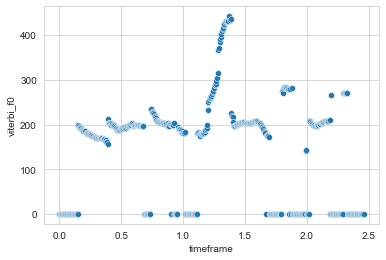

In [81]:
# 
sns.set_style('whitegrid')
ax = sns.scatterplot(x='timeframe', y='viterbi_f0', data=selected_tagged_data['bfamcv02__045__RUT'])
#ax = sns.stripplot(x='Tag', y='f0slo', data=filtered)

In [82]:
import matplotlib.pyplot as plt

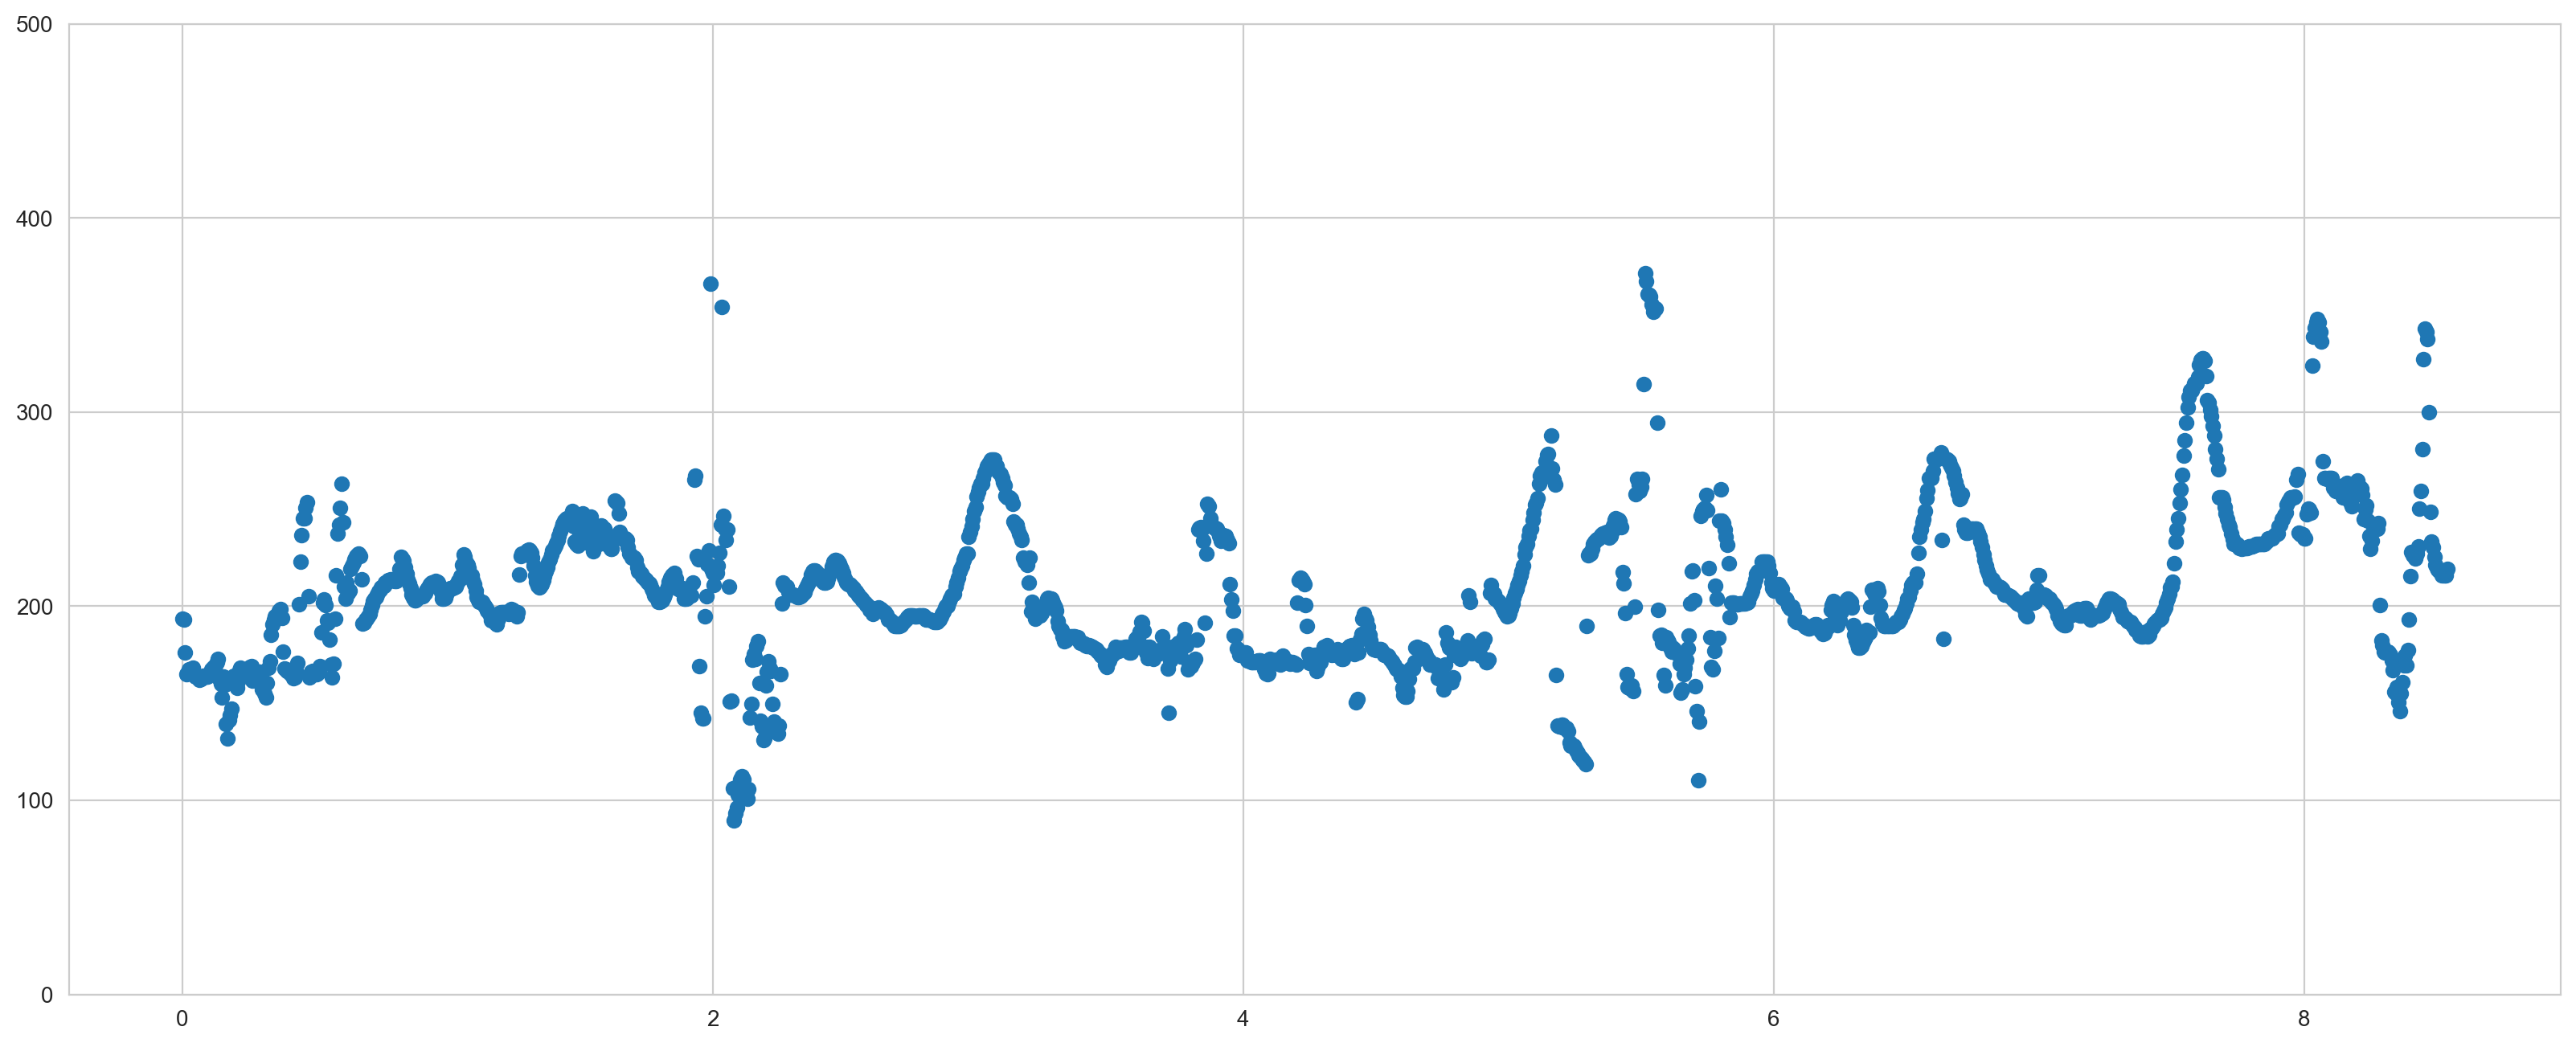

In [88]:
from matplotlib.pyplot import figure
figure(figsize=(20, 8), dpi=200)


#colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'gray', 5:'orange'}
#labels = {'red':'bana', 'green':'praat_ac', 'blue':'pefac', 'yellow':'straight', 'gray':'swipep', 'orange':'yin'}
markers = {0:'1', 1:'x', 2:'+', 3:'.', 4:'d', 5:'-'}

#for i in pd.Series(winning_path).map(colors):
#    print(i)

#ax.scatter(df['population'], df['Area'], c=df['continent'].map(colors))

#plt.scatter(df['x'], df['y'], c=df['algo'].map(colors), label='viterbi', marker=df['algo'].map(markers))
filename = 'bfammn05__092__CAR'

plt.ylim(0,500)
plt.scatter(selected_tagged_data[filename]['timeframe'], selected_tagged_data[filename]['bana'])


## TODO

- (Ok) Fazer um inner join entre a planilha de tempos das fronteiras com a planilha 'clustered consolidated full.xls'
- Tomar os valores de taxa de articulação e checar pra tanto qual é o script a ser usado
- É preciso checar sempre qual é o COM do qual o AUX depende, mas COMO?
- É preciso sempre tomar o nível inicial e final de f0 de AUX e COM
- Problema do alinhamento das formas: usar DTW? tomar o ponto máximo como meio e pegar número de pontos iguais pra cada parte (nas unidades onde o movimento seja relevante) 
- Não me parece fazer muito sentido comparar os valores de AUX com a média do COM... mas como resolver esse problema

- (ok) É melhor colocar pra cada frame qual é a unidade ou separar um dataframe pra cada unidade?
- (Pode ser feito depois) Além disso, já náo seria melhor separar de uma vez só o COM e o AUX que interessam em cada caso?
- EU NÃO PODERIA CENTRALIZAR OS DADOS DE F0 DE TODOS OS ENUNCIADOS CONJUNTAMENTE AO INVÉS DE tomar COM como referência?
- Como tratar os casos em que AUX está incrustado em um Comment?
- Mudar valores de f0 zerados para NaN

# Medidas

- média de AUX e de COM
- sd
- valores de início e fim de COM
- valores de máximo e mínima de AUX
- excursão de f0
- alinhamento de máximo e mínimo (poderia ser um percentual de AUX, que valeria 1, ver Oliver)
- Como fazer a normalização? Ver: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
- RobustScaler ?

# Outros

- modelo estatístico para identificar a qual unidade ilocucionária uma outra unidade está subordinada

In [1]:
# dialog_ageA_edB_sexM_nao = dialog_ageA_edB_sexM[dialog_ageA_edB_sexM["File"].str.contains("(não)(?!.*não)")==True]
